In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/wcukierski/enron-email-dataset'
od.download(download_url)
#eb20fcc348ef957582b0fcc95f385582

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: atharvaxo
Your Kaggle Key: ··········


100%|██████████| 358M/358M [00:11<00:00, 33.0MB/s]


In [ ]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

filepath = "/content/enron-email-dataset/emails.csv"
# Read the data into a pandas dataframe called emails
emails = pd.read_csv(filepath)
headers = [header for header in emails.columns]
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(display(emails.head()))

In [ ]:
print(emails.loc[0]["message"])

NameError: ignored

In [ ]:
import email

def insert_value(dictionary, key, value):
    if key in dictionary:
        values = dictionary.get(key)
        values.append(value)
        dictionary[key] = values
    else:
        dictionary[key] = [value]
    return dictionary

def get_headers(df, header_names):
    headers = {}
    messages = df["message"]
    for message in messages:
        e = email.message_from_string(message)
        for item in header_names:
            header = e.get(item)
            insert_value(dictionary = headers, key = item, value = header)
    print("Successfully retrieved header information!")
    return headers
header_names = ["Date", "Subject", "X-Folder", "X-From", "X-To"]
headers = get_headers(emails, header_names)

Successfully retrieved header information!


In [ ]:
def get_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)
        # get message body
        message_body = e.get_payload()
        message_body = message_body.lower()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages
msg_body = get_messages(emails)
emails["Message-Body"] = msg_body

Successfully retrieved message body from e-mails!


In [ ]:
x_from = pd.DataFrame(headers["X-From"], columns = ["X-From"])
print(x_from.iloc[:1000]["X-From"].unique()[:10])
if "X-From" not in emails.columns:
    emails = pd.concat([emails, x_from], axis = 1, join = 'inner')

['Phillip K Allen' 'Ina Rangel'
 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'
 '"Bloomberg.com" <messenger@ecm.bloomberg.com>'
 '"Arthur O\'Donnell" <aod@newsdata.com>' 'critical.notice@Enron.com'
 'market-reply@LISTSERV.DOWJONES.COM' 'Rebecca W Cantrell'
 '"Earnings.com" <webmaster@earnings.com>' 'Paul Kaufman']


In [ ]:
def add_name(df, column, labels):
    new_data = {}
    for item in df[column]:
        tokens = item.split('/')
        for i in range(0, len(labels)):
            value = tokens[i]
            key = labels[i]
            new_data = insert_value(new_data, key, value)
    for key, value in new_data.items():
        df[key] = pd.Series(value)
    print("Successfully added new column!")
    return df
emails = add_name(df = emails, column = "file", labels = ["employee"])

Successfully added new column!


In [ ]:
def add_headers(df, header_list):
    for label in header_list:
        df_new = pd.DataFrame(headers[label], columns = [label])
        if label not in df.columns:
            df = pd.concat([df, df_new], axis = 1)
    return df
remaining_headers = ["Date", "Subject", "X-To", "X-From", "X-Folder"]
emails = add_headers(df = emails, header_list = remaining_headers)
print("Here is the emails dataframe after appending all the relevant headers")
print(display(emails.iloc[:1]))

Here is the emails dataframe after appending all the relevant headers


,file,message,Message-Body,X-From,employee,Date,Subject,X-To,X-Folder
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700...",here is our forecast\n\n,Phillip K Allen,allen-p,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail"


None


In [ ]:
print(emails["X-Folder"].sample(7))

513084                        \Wolfe, Jason\Wolfe, Jason\Deleted Items
28917                                                     \sbeck\Inbox
131387                  \CGERMAN (Non-Privileged)\Germany, Chris\Inbox
300176                   \Kay_Mann_June2001_4\Notes Folders\'sent mail
274510            \Matthew_Lenhart_Jun2001\Notes Folders\All documents
346235    \Gerald_Nemec_Dec2000_June2001_2\Notes Folders\All documents
160746         \SHARRIS1 (Non-Privileged)\Harris, Steven\Deleted Items
Name: X-Folder, dtype: object


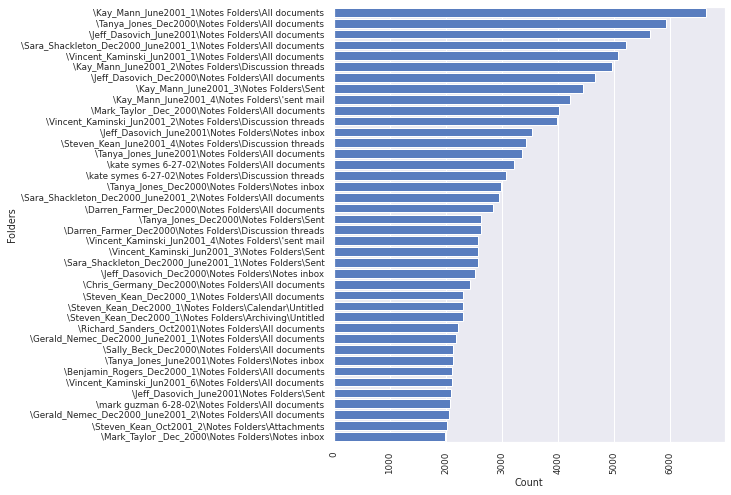

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
email_count = emails["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation)
    plt.show()
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [ ]:
williams = emails[emails["employee"] == "williams-w3"]
williams["X-Folder"].value_counts()[:8]

\ExMerge - Williams III, Bill\Schedule Crawler             1398
\Williams III, Bill (Non-Privileged)\Bill Williams III     1022
\ExMerge - Williams III, Bill\Sent Items                    519
\ExMerge - Williams III, Bill\Inbox                         137
\ExMerge - Williams III, Bill\HR                             86
\ExMerge - Williams III, Bill\SymesEES                       81
\ExMerge - Williams III, Bill\Human Resources                45
\ExMerge - Williams III, Bill\Operations Committee/ISAS      19
Name: X-Folder, dtype: int64

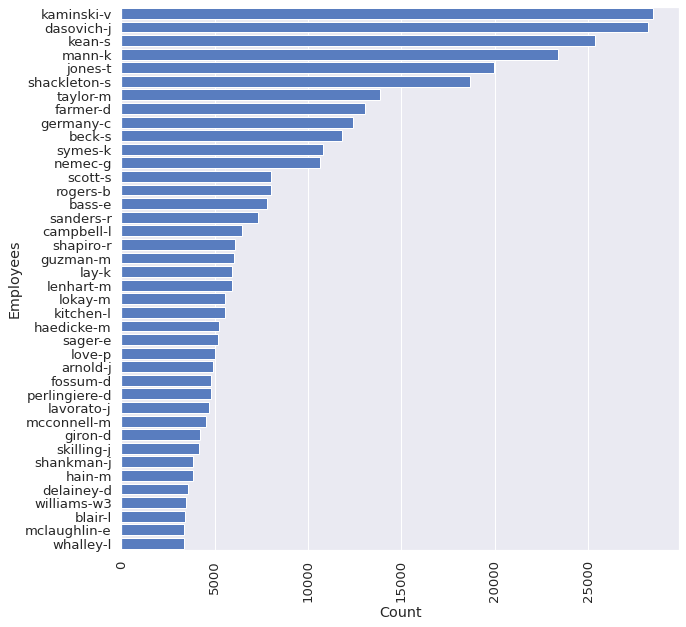

In [ ]:
mail_count = emails["employee"].value_counts()
indices = mail_count.index
count = pd.DataFrame(mail_count)
count.rename(columns = {"employee": "Count"}, inplace = True)
count["Employees"] = indices
barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)

In [ ]:
emails["Date"] = pd.to_datetime(emails["Date"])
print(emails.iloc[:1]["Date"])

0    2001-05-14 16:39:00-07:00
Name: Date, dtype: object


In [ ]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders
emails["X-Folder"] = preprocess_folder(emails["X-Folder"])

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-56-ee32cc14c640>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item is None or item is '':


Folder cleaned!


In [ ]:
unwanted_folders = ["all documents", "deleted items", "discussion threads", "sent", "deleted Items", "inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
emails = emails.loc[~emails['X-Folder'].isin(unwanted_folders)]
print(emails.iloc[:15]["X-Folder"].value_counts())

straw                   8
2000 conference         3
contacts                2
active international    1
avaya                   1
Name: X-Folder, dtype: int64


In [ ]:
email_count = dict(emails["employee"].value_counts())
reduced_emails = [key for key, val in email_count.items() if val >= 2000]
emails = emails.loc[emails['employee'].isin(reduced_emails)]
print(emails["employee"].value_counts())

kean-s         5550
kaminski-v     4483
kitchen-l      4034
farmer-d       3786
williams-w3    2775
lokay-m        2554
taylor-m       2477
shapiro-r      2036
beck-s         2013
Name: employee, dtype: int64


In [ ]:
emails.isnull().sum()

file            0
message         0
Message-Body    0
X-From          3
employee        0
Date            0
Subject         0
X-To            3
X-Folder        3
dtype: int64

In [ ]:
emails.dropna(inplace = True)
#print("Rows with missing values have been removed")
emails.isnull().sum()

file            0
message         0
Message-Body    0
X-From          0
employee        0
Date            0
Subject         0
X-To            0
X-Folder        0
dtype: int64

In [ ]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = row.split(" ")
    return tokens

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-61-436390dc43b2>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if row is None or row is '':


In [ ]:
import re

def remove_reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower()
            token = re.sub(r'[\W\d]', " ", token)
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def assemble_bag(data):
    data = data.apply(tokenize)
    #data = data.apply(stop_word_removal)
    data = data.apply(remove_reg_expressions)

    unique_tokens = []
    single_tokens = []

    for item in data:
        for token in item:
            if token in single_tokens:
                if token not in unique_tokens:
                    unique_tokens.append(token)
            else:
                single_tokens.append(token)

    df = pd.DataFrame(0, index = np.arange(len(data)), columns = unique_tokens)

    for i, item in enumerate(data):
        for token in item:
            if token in unique_tokens:
                df.iloc[i][token] += 1
    return df

In [ ]:
employee = emails[emails["employee"] == "kaminski-v"]

In [ ]:
def remove_folders(emails, n):
    # Returns the folders containing more than 'n' number of e-mails
    email_count = dict(emails["X-Folder"].value_counts())
    small_folders = [key for key, val in email_count.items() if val <= n]
    emails = emails.loc[~emails['X-Folder'].isin(small_folders)]
    return emails

In [ ]:
n = 200
employee = remove_folders(employee, n)

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df):
    class_le = LabelEncoder()
    # apply label encoder on the `Folder` column
    y = class_le.fit_transform(df['X-Folder'])
    df.loc[:,'y'] = y
    return df

In [ ]:
label_encoder(employee)
print("Randomly selected labels representing our folders")
unique_folders = employee["y"].unique()
print (unique_folders)

Randomly selected labels representing our folders
[1 2 4 0 3 5 6]


In [ ]:
def sort(df):
    df = df.sort_values(by = "Date", axis = 0)
    return df

In [ ]:
employee = sort(employee)
print(display(employee.loc[:,("Date", "y", "X-Folder")][:10]))

,Date,y,X-Folder
210435,1999-12-10 06:43:00-08:00,2,management
209880,1999-12-10 09:17:00-08:00,1,ene_ect
221267,1999-12-10 10:46:00-08:00,5,resumes
210434,1999-12-12 07:22:00-08:00,2,management
210433,1999-12-13 02:08:00-08:00,2,management
210431,1999-12-13 23:51:00-08:00,2,management
210685,1999-12-14 00:17:00-08:00,2,management
210684,1999-12-14 00:22:00-08:00,2,management
211067,1999-12-14 02:14:00-08:00,4,projects
210683,1999-12-14 02:46:00-08:00,2,management


None


In [ ]:
def prepare_features(df):
    from_bag = assemble_bag(df["X-From"])
    to_bag = assemble_bag(df["X-To"])
    message_bag = assemble_bag(df["Message-Body"])
    subject_bag = assemble_bag(df["Subject"])
    frames = [from_bag, subject_bag, to_bag, message_bag]
    X = pd.concat(frames, axis = 1, join = 'inner')
    X.drop(labels = [" ", ""], inplace = True, axis = 1)
    return X

In [ ]:
X = prepare_features(employee)

In [ ]:
# print(display(X.ix[:3, 1000:]))
# print("A peek into some of the columns in the features dataframe")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
def split_data(X, employee):
    # split data into training and testing sets
    training_size = int(len(employee) * 0.8)
    X_train = X[:training_size]
    X_test = X[training_size:]
    y_test = employee[training_size:]["y"]
    y_train = employee[:training_size]["y"]
    return X_train, X_test, y_test, training_size

In [ ]:
X_train, X_test, y_test, training_size = split_data(X, employee)
# X_train, X_test, y_test, y_train = train_test_split(X, employee, test_size = 0.2)
# X_train

In [ ]:
def fit(df, training_size, X_train):
    models = {}
    filtered_folders = []
    unique_folders = df["y"].unique()
    for folder in unique_folders:
        model = LogisticRegression(max_iter = 100000)
        y_train = df[:training_size]["y"] == folder
        try:
            model.fit(X_train, y_train)
            models[folder] = model
            filtered_folders.append(folder)
        except:
            pass
    return models, filtered_folders


In [ ]:
models, filtered_folders = fit(employee, training_size, X_train)

In [ ]:
def predict(X_test, models, filtered_folders):
    testing_probs = pd.DataFrame(columns = filtered_folders)
    for folder in filtered_folders:
        # Compute probability
        testing_probs[folder] = models[folder].predict_proba(X_test)[:,1]
    y_test_pred = testing_probs.idxmax(axis = 1)
    return y_test_pred

In [ ]:
y_test_pred = predict(X_test, models, filtered_folders)

In [ ]:
from sklearn.metrics import accuracy_score

def acc_score(y_test, y_test_pred):
    score = accuracy_score(y_test, y_test_pred)
    return score

In [ ]:
acc_score(y_test, y_test_pred)

0.6515679442508711

In [ ]:
employee_list = emails["employee"].unique()
folder_size = [50, 100, 150, 200, 250]

def classify_emails(data, folder_size, employee_list):
    results = pd.DataFrame(columns = folder_size)
    results["employee"] = employee_list
    for i, name in enumerate(employee_list):
        for num in folder_size:
            # get data for employee
            employee = data[data["employee"] == name]
            employee = remove_folders(employee, num)
            employee = label_encoder(employee)
            if len(employee["y"].unique()) < 2:
                break
            employee = sort(employee)
            X = prepare_features(employee)
            X_train, X_test, y_test, training_size = split_data(X, employee)
            models, filtered_folders = fit(employee, training_size, X_train)
            y_test_pred = predict(X_test, models, filtered_folders)
            score = acc_score(y_test, y_test_pred)
            # Add score to dataframe
            results.loc[i][num] = score
    return results
# print(emails.describe())
print(emails['Subject'][:5])
# results = classify_emails(data = emails[:3000], folder_size = folder_size, employee_list = employee_list)
# print(display(results))
# print(results)

21617                       2001 Group Expenses
21618                Plan 2001 - Global Markets
21619                Plan 2001 - Global Markets
21620    2001 Plan vs 2000 Forecast Explanation
21621                    Re: 2001 Plan Timeline
Name: Subject, dtype: object


# Approach 2

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn
import nltk
import os
import random
import email
import re
from sklearn.feature_extraction.text import TfidfVectorizer


import string
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# email module has some useful functions
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
filepath = "/content/enron-email-dataset/emails.csv"
# Read the data into a pandas dataframe called emails
df = pd.read_csv(filepath)
df = df.sample(frac=0.1, replace=True, random_state=42)
df.shape

(51740, 2)

In [ ]:
df.head()

,file,message
121958,geaccone-t/deleted_items/34.,Message-ID: <15294201.1075859030603.JavaMail.e...
146867,guzman-m/all_documents/19.,Message-ID: <27072313.1075840580998.JavaMail.e...
131932,germany-c/sent_items/1118.,Message-ID: <8145314.1075845150150.JavaMail.ev...
365838,presto-k/sent_items/312.,Message-ID: <30145653.1075854837828.JavaMail.e...
259178,kitchen-l/_americas/netco_hr/13.,Message-ID: <18051711.1075840881312.JavaMail.e...


In [ ]:
# create list of email objects
emails = list(map(email.parser.Parser().parsestr,df['message']))

# extract headings such as subject, from, to etc..
headings  = emails[0].keys()

# Goes through each email and grabs info for each key
# doc['From'] grabs who sent email in all emails
for key in headings:
    df[key] = [doc[key] for doc in emails]

In [ ]:
##Useful functions
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

df['body'] = list(map(get_raw_text, emails))

df['user'] = df['file'].map(lambda x: x.split('/')[0])

In [ ]:
df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,user
121958,geaccone-t/deleted_items/34.,Message-ID: <15294201.1075859030603.JavaMail.e...,<15294201.1075859030603.JavaMail.evans@thyme>,"Thu, 18 Oct 2001 19:15:32 -0700 (PDT)",exchange.administrator@enron.com,mary.trosper@enron.com,Undeliverable: FW: 2002 Plan Lay Presentation ...,1.0,text/plain; charset=us-ascii,7bit,Exchange System Administrator <.>,"Trosper, Mary </O=ENRON/OU=NA/CN=RECIPIENTS/CN...",,,"\TGEACCO (Non-Privileged)\Geaccone, Tracy\Dele...",Geaccone-T,TGEACCO (Non-Privileged).pst,\n--------- Inline attachment follows --------...,geaccone-t
146867,guzman-m/all_documents/19.,Message-ID: <27072313.1075840580998.JavaMail.e...,<27072313.1075840580998.JavaMail.evans@thyme>,"Mon, 30 Apr 2001 15:22:00 -0700 (PDT)",lillahmay@aol.com,"alex3325@yahoo.com, ryanb@gosfgiants.com, mark...",party,1.0,text/plain; charset=us-ascii,7bit,LillahMay@aol.com,"alex3325@yahoo.com, ryanb@gosfgiants.com, mark...",,,\mark guzman 6-28-02\Notes Folders\All documents,GUZMAN-M,mark guzman 6-28-02.nsf,Greetings everyone. I just wanted to thank al...,guzman-m
131932,germany-c/sent_items/1118.,Message-ID: <8145314.1075845150150.JavaMail.ev...,<8145314.1075845150150.JavaMail.evans@thyme>,"Thu, 19 Apr 2001 11:24:00 -0700 (PDT)",chris.germany@enron.com,scott.neal@enron.com,EOL,1.0,text/plain; charset=us-ascii,7bit,Chris Germany,Scott Neal <Scott Neal/HOU/ECT@ECT>,"Judy Townsend <Judy Townsend/HOU/ECT@ECT>, Sco...",,"\Germany, Chris\Germany, Chris\Sent Items",GERMANY-C,"Germany, Chris.pst","Please give Judy Townsend, Scott Goodell, and ...",germany-c
365838,presto-k/sent_items/312.,Message-ID: <30145653.1075854837828.JavaMail.e...,<30145653.1075854837828.JavaMail.evans@thyme>,"Wed, 5 Sep 2001 16:45:24 -0700 (PDT)",m..presto@enron.com,"harry.arora@enron.com, jim.meyn@enron.com",FW: Generation Asset Valuation,1.0,text/plain; charset=us-ascii,7bit,"Presto, Kevin M. </O=ENRON/OU=NA/CN=RECIPIENTS...","Arora, Harry </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",,,"\Presto, Kevin M (Non-Privileged)\Presto, Kevi...",Presto-K,"Presto, Kevin M (Non-Privileged).pst",Any interest in attending?\n\n -----Original M...,presto-k
259178,kitchen-l/_americas/netco_hr/13.,Message-ID: <18051711.1075840881312.JavaMail.e...,<18051711.1075840881312.JavaMail.evans@thyme>,"Mon, 4 Feb 2002 07:02:05 -0800 (PST)",david.oxley@enron.com,louise.kitchen@enron.com,FW: Fw: I know its annoying but,1.0,text/plain; charset=us-ascii,7bit,"Oxley, David </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","Kitchen, Louise </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,"\ExMerge - Kitchen, Louise\'Americas\Netco HR",KITCHEN-L,louise kitchen 2-7-02.pst,Did you do all this over weekend?\n\n-----Orig...,kitchen-l


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()
df.dtypes

file                         object
message                      object
Message-ID                   object
Date                         object
From                         object
To                           object
Subject                      object
Mime-Version                 object
Content-Type                 object
Content-Transfer-Encoding    object
X-From                       object
X-To                         object
X-cc                         object
X-bcc                        object
X-Folder                     object
X-Origin                     object
X-FileName                   object
body                         object
user                         object
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)

        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


df['Subject_new'] = df['Subject'].apply(clean_column)
df['body_new'] = df['body'].apply(clean_column)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['body_new'].head(5)

121958    inline attachment follows   from  oenronounacn...
146867    greetings everyone  i just wanted to thank all...
131932    please give judy townsend scott goodell and my...
365838    any interest in attending   original message f...
259178    did you do all this over weekend  original mes...
Name: body_new, dtype: object

In [ ]:
df['Subject_new'].head(10)

121958    undeliverable fw  plan lay presentation run th...
146867                                                party
131932                                                  eol
365838                        fw generation asset valuation
259178                        fw fw i know its annoying but
119879                                          steves pics
110268                             neon discussion november
207892                                       enron sitemepr
54886                                 kit kat social update
137337                                  fw ghetto xmas song
Name: Subject_new, dtype: object

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
to_add = ['FW', 'ga', 'httpitcappscorpenroncomsrrsauthemaillinkaspidpage', 'cc', 'aa', 'aaa', 'aaaa',
         'hou', 'cc', 'etc', 'subject', 'pm', 'ect', 'com', 'recipient']

for i in to_add:
    stopwords.add(i)

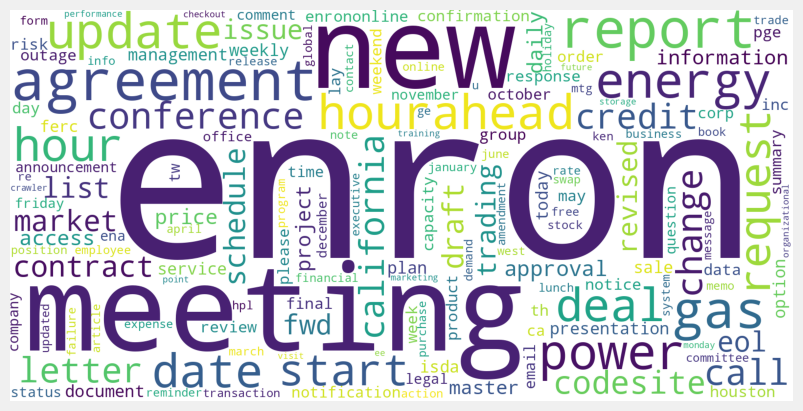

In [ ]:
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40,
                          random_state=42
                         ).generate(' '.join(df['Subject_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

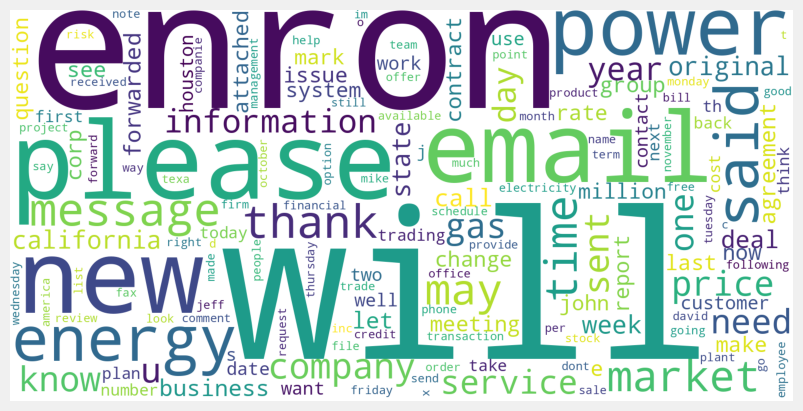

In [ ]:
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40,
                          random_state=42
                         ).generate(' '.join(df['body_new'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = df['body_new']
# data.head()

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 5000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names_out()).head(20)

,aa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaron,ab,abb,ability,able,absence,absolutely,abx,...,yo,york,youd,youll,young,youre,youve,zero,zimin,zone
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.337186,0.259409,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.038184,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.084653,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.007023,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.025435,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

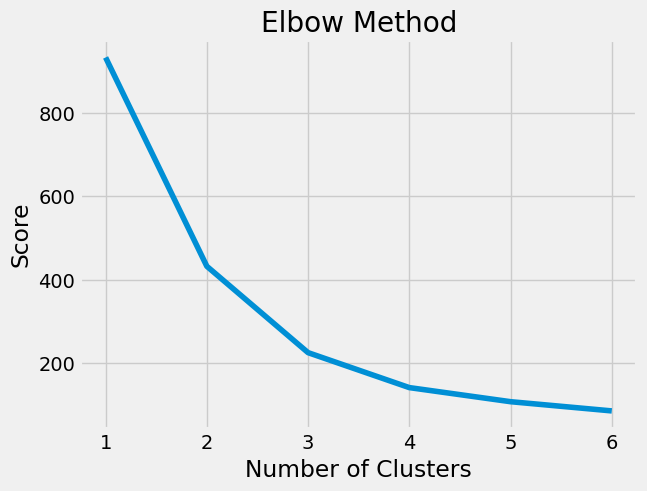

In [ ]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score = [i*-1 for i in score]

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 1.03 s, sys: 364 ms, total: 1.39 s
Wall time: 1.05 s
[2 0 0 ... 0 0 0]


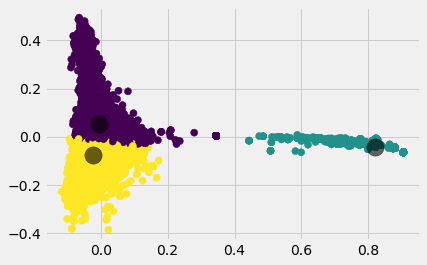

In [ ]:
kmeans = KMeans(n_clusters= 3)
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);
print(prediction)

In [ ]:
print(len(prediction))

51740


In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    print(labels)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)
dfs[2] = dfs[2][1:]

[0 1 2]


<Axes: xlabel='score', ylabel='features'>

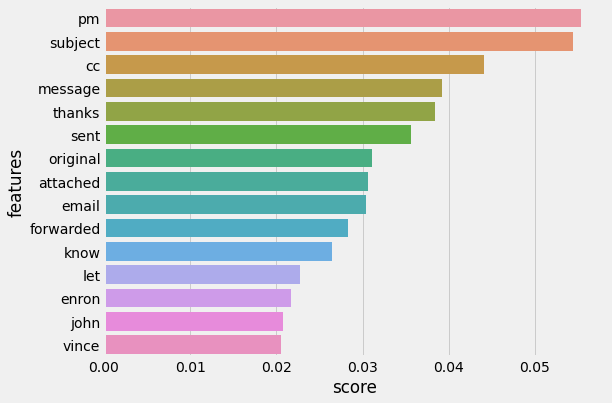

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

<Axes: xlabel='score', ylabel='features'>

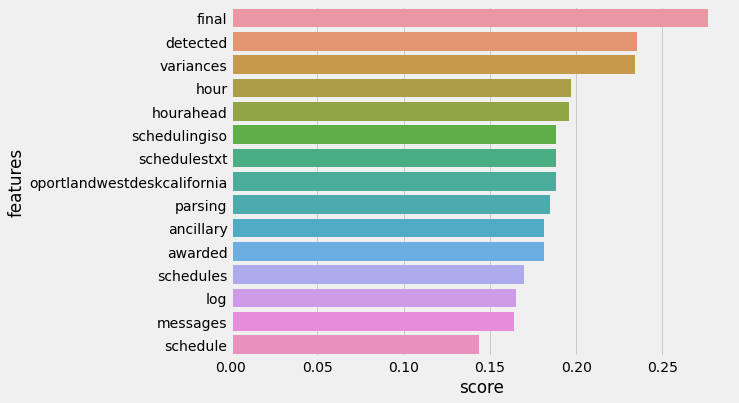

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

<Axes: xlabel='score', ylabel='features'>

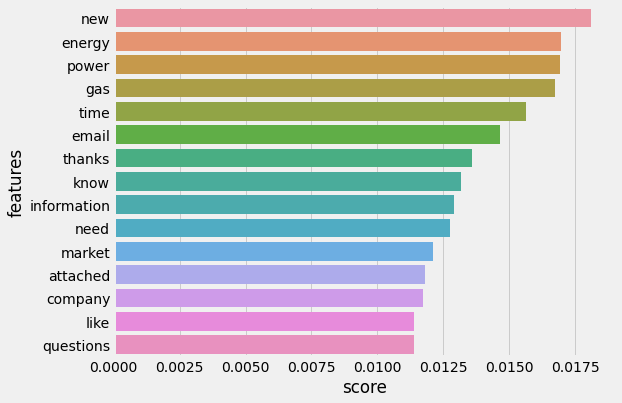

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[2][:15])

<ipython-input-42-0a3f14d06687>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  yticks = ax.set_yticklabels(df.features)


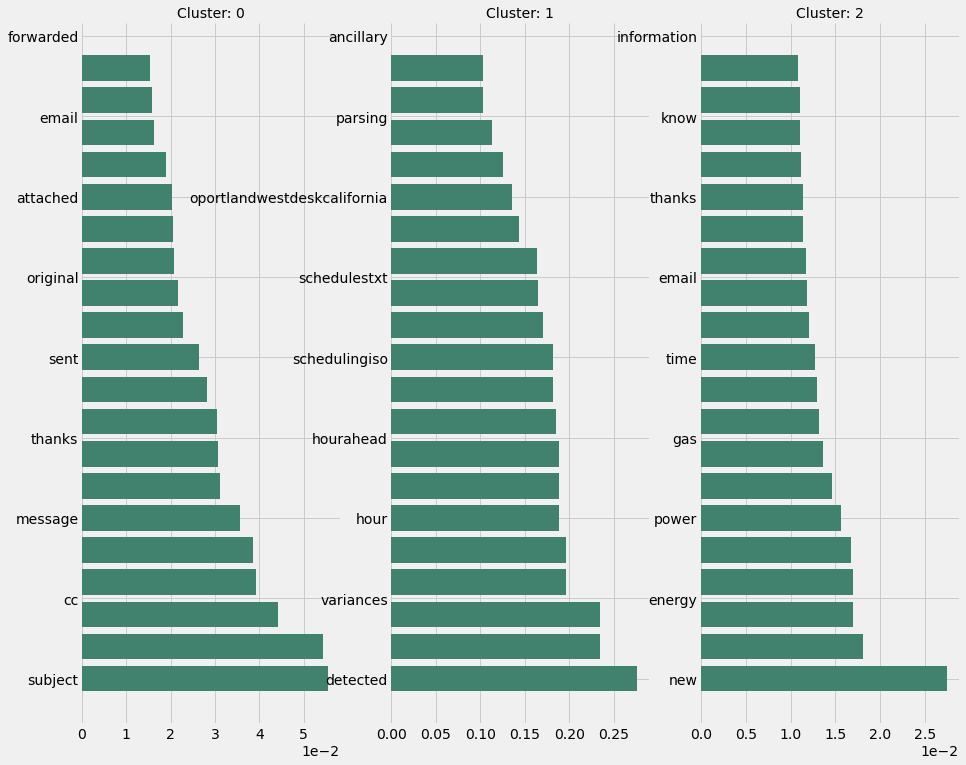

In [ ]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)